In [54]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import warnings
import shap

from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

import xgboost as xgb

from pdpbox import pdp, info_plots
from pdpbox import pdp, info_plots

sns.set()

In [146]:
#df=pd.read_excel('AC2020_AnnualisedEntryExit.xlsx', sheet_name = None)
xls = pd.ExcelFile('AC2020_AnnualisedEntryExit.xlsx')
df1 = xls.parse('Annualised', skiprows=6, index_col=None, na_values=['NA'])

xls = pd.ExcelFile('AC2020_ByQhrEntryExit.xlsx')
df2 = xls.parse('ByQhr', skiprows=6, index_col=None, na_values=['NA'])

xls = pd.ExcelFile('public-transport-crime-london.xls')
df3 = xls.parse('Volume and Rates', skiprows=1, index_col=None, na_values=['NA'])

xls = pd.ExcelFile('public-transport-crime-london.xls')
df4 = xls.parse('Trend', skiprows=1, index_col=None, na_values=['NA'])

xls = pd.ExcelFile('technical-analysis-data-bus-services.xls')
df5 = xls.parse('Passenger journeys by route', skiprows=4, index_col=None, na_values=['NA'])

xls = pd.ExcelFile('technical-analysis-data-bus-services.xls')
df6 = xls.parse('Concessions', skiprows=4, index_col=None, na_values=['NA'])

xls = pd.ExcelFile('technical-analysis-data-bus-services.xls')
df7 = xls.parse('Demand vs km comparison', skiprows=2, index_col=None, na_values=['NA'])


In [147]:
df1

,Mode,NLC,ASC,Station,Coverage,Source,Entries,Entries.1,Entries.2,Entries.3,Exits,Exits.1,Exits.2,Exits.3,En/Ex
0,LU,500,ACTu,Acton Town,Station entry / exit,Gateline,3701.900000,3673.333333,2023.250000,1476.000000,3655.100000,3556.333333,2099.250000,1580.500000,3.568528e+06
1,LU,502,ALDu,Aldgate,Station entry / exit,Gateline,2489.416667,2446.666667,1818.500000,1706.000000,2822.083333,2948.000000,2016.500000,1814.666667,2.775844e+06
2,LU,503,ALEu,Aldgate East,Station entry / exit,Gateline,3198.307692,3351.333333,2336.000000,1320.000000,3005.461538,3073.333333,2386.000000,1281.000000,3.144899e+06
3,LU,505,ALPu,Alperton,Station entry / exit,Gateline,2072.538462,2086.250000,1210.000000,756.500000,2194.692308,2214.250000,1211.666667,821.750000,2.064990e+06
4,LU,506,AMEu,Amersham,Station entry / exit,Gateline,980.466667,897.500000,315.250000,228.250000,965.000000,917.750000,304.000000,202.500000,8.633607e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,EZL,719,SFDu,Stratford,TfL Rail boarding / alighting,Scaled,9632.292627,9750.373508,8583.666731,6660.368463,10172.101614,10481.647073,8371.387170,6261.986496,8.480044e+06
454,EZL,3151,TAPr,Taplow,Station entry / exit,Gateline,28.040235,24.406229,6.900757,10.309712,30.555539,29.535526,7.228427,8.100995,2.087803e+04
455,EZL,3155,TWYr,Twyford,Station entry / exit,Gateline,17.350027,17.752001,4.629820,3.176439,19.794726,21.900794,5.249525,4.634094,1.340676e+04
456,EZL,3174,WDTr,West Drayton,Station entry / exit,Gateline,1406.247880,1361.659484,691.093914,485.120557,1539.952232,1502.785629,701.181963,413.567677,1.104778e+06


In [148]:
df1.isna().sum()

Mode         0
NLC          0
ASC          0
Station      0
Coverage     2
Source       2
Entries      2
Entries.1    2
Entries.2    2
Entries.3    2
Exits        2
Exits.1      2
Exits.2      2
Exits.3      2
En/Ex        2
dtype: int64

In [149]:
df1= df1.drop(df1[df1['Entries'].isna()].index)

In [150]:
df1.isna().sum()

Mode         0
NLC          0
ASC          0
Station      0
Coverage     0
Source       0
Entries      0
Entries.1    0
Entries.2    0
Entries.3    0
Exits        0
Exits.1      0
Exits.2      0
Exits.3      0
En/Ex        0
dtype: int64

In [151]:
val=['Mode','NLC','Station','Coverage','Source','Entries']

In [152]:
def preprocess(dataset):
    X = pd.DataFrame()

    X = dataset[val]
    
    Y = dataset['En/Ex']

    # Label encoding for categorical variables
    label_encoder = LabelEncoder()

    X['Mode'] = label_encoder.fit_transform(dataset['Mode'])
    #X['ASC'] = label_encoder.fit_transform(dataset['ASC'])
    X['Station'] = label_encoder.fit_transform(dataset['Station'])
    X['Coverage'] = label_encoder.fit_transform(dataset['Coverage'])
    X['Source'] = label_encoder.fit_transform(dataset['Source'])


    return X, Y

In [153]:
processed_dataset = preprocess(df1)
X_train, X_test, Y_train, Y_test = train_test_split(*processed_dataset, test_size=0.3, shuffle=True)

Text(0.5, 1.0, 'Correlation Heatmap')

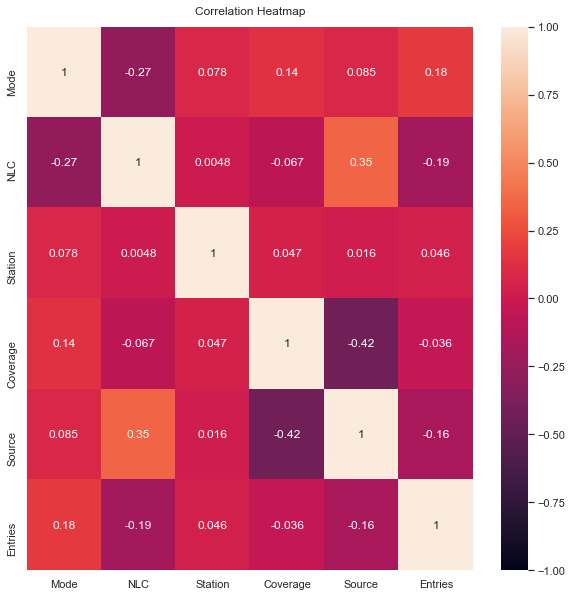

In [154]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [155]:
shap.initjs()
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)
booster = model.get_booster()
model2 = booster.save_raw()[4:]
booster.save_raw = lambda: model2
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test, approximate=True)
index = 110
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test.iloc[index,:])

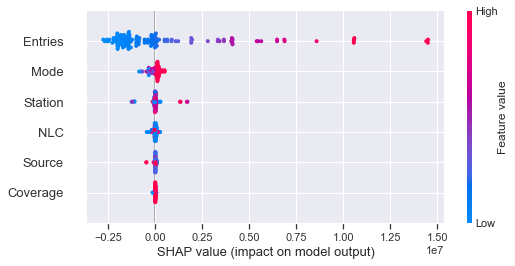

In [156]:
shap.summary_plot(shap_values, X_test)

In [157]:
df2

,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,...,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500
0,LU,500,ACTu,Acton Town,Station entry / exit,2020,MTT,IN,3701.900000,288.200000,...,0,0,0,0,0,0,0,0,0.600000,15.300000
1,LU,502,ALDu,Aldgate,Station entry / exit,2020,MTT,IN,2489.416667,172.583333,...,0,0,0,0,0,0,0,0,0.000000,0.000000
2,LU,503,ALEu,Aldgate East,Station entry / exit,2020,MTT,IN,3198.307692,103.000000,...,0,0,0,0,0,0,0,0,0.000000,0.538462
3,LU,505,ALPu,Alperton,Station entry / exit,2020,MTT,IN,2072.538462,360.230769,...,0,0,0,0,0,0,0,0,0.230769,0.076923
4,LU,506,AMEu,Amersham,Station entry / exit,2020,MTT,IN,980.466667,148.400000,...,0,0,0,0,0,0,0,0,0.133333,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,EZL,719,SFDu,Stratford,TfL Rail boarding / alighting,2020,SUN,OUT,6261.986496,96.811408,...,0,0,0,0,0,0,0,0,0.267435,0.936022
3660,EZL,3151,TAPr,Taplow,Station entry / exit,2020,SUN,OUT,8.100995,0.000000,...,0,0,0,0,0,0,0,0,0.000000,0.000000
3661,EZL,3155,TWYr,Twyford,Station entry / exit,2020,SUN,OUT,4.634094,0.000000,...,0,0,0,0,0,0,0,0,0.000000,0.000000
3662,EZL,3174,WDTr,West Drayton,Station entry / exit,2020,SUN,OUT,413.567677,2.092784,...,0,0,0,0,0,0,0,0,0.697595,0.000000


In [158]:
df2.isna().sum()

Mode          0
NLC           0
ASC           0
Station       0
Coverage     16
             ..
0345-0400     0
0400-0415     0
0415-0430     0
0430-0445     0
0445-0500     0
Length: 111, dtype: int64

In [159]:
a=df2.columns
a

Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ',
       ...
       '0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500'],
      dtype='object', length=111)

In [160]:
df2=df2.drop(columns=['0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500','0000-0015', '0015-0030', '0030-0045', '0045-0100', '0100-0115',
       '0115-0130', '0130-0145', '0145-0200', '0200-0215', '0215-0230', '0500-0515',
       '0515-0530', '0530-0545', '0545-0600', '0600-0615', '0615-0630',
       '0630-0645', '0645-0700', '0700-0715', '0715-0730', '0730-0745',
       '0745-0800', '0800-0815', '0815-0830', '0830-0845', '0845-0900',
       '0900-0915', '0915-0930', '0930-0945', '0945-1000', '1000-1015',
       '1015-1030', '1030-1045', '1045-1100', '1100-1115', '1115-1130',
       '1130-1145', '1145-1200', '1200-1215', '1215-1230', '1230-1245',
       '1245-1300', '1300-1315', '1315-1330', '1330-1345', '1345-1400',
       '1400-1415', '1415-1430', '1430-1445', '1445-1500', '1500-1515',
       '1515-1530', '1530-1545', '1545-1600', '1600-1615', '1615-1630',
       '1630-1645', '1645-1700', '1700-1715', '1715-1730', '1730-1745',
       '1745-1800', '1800-1815', '1815-1830', '1830-1845', '1845-1900',
       '1900-1915', '1915-1930', '1930-1945', '1945-2000', '2000-2015',
       '2015-2030', '2030-2045', '2045-2100', '2100-2115', '2115-2130',
       '2130-2145', '2145-2200', '2200-2215', '2215-2230', '2230-2245',
       '2245-2300', '2300-2315', '2315-2330', '2330-2345', '2345-0000'])

In [161]:
df2

,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,AM Peak,Inter Peak,PM Peak,Evening,Late
0,LU,500,ACTu,Acton Town,Station entry / exit,2020,MTT,IN,3701.900000,288.200000,1101.200000,1185.700000,824.200000,213.200000,89.400000
1,LU,502,ALDu,Aldgate,Station entry / exit,2020,MTT,IN,2489.416667,172.583333,520.166667,622.000000,920.000000,208.416667,46.250000
2,LU,503,ALEu,Aldgate East,Station entry / exit,2020,MTT,IN,3198.307692,103.000000,472.692308,1063.923077,1126.461538,333.230769,99.000000
3,LU,505,ALPu,Alperton,Station entry / exit,2020,MTT,IN,2072.538462,360.230769,667.846154,505.692308,408.538462,99.384615,30.846154
4,LU,506,AMEu,Amersham,Station entry / exit,2020,MTT,IN,980.466667,148.400000,424.666667,256.600000,124.133333,21.066667,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,EZL,719,SFDu,Stratford,TfL Rail boarding / alighting,2020,SUN,OUT,6261.986496,96.811408,567.496705,2750.433488,1502.181428,935.353311,409.710156
3660,EZL,3151,TAPr,Taplow,Station entry / exit,2020,SUN,OUT,8.100995,0.000000,0.659099,3.505234,2.665441,0.785938,0.485283
3661,EZL,3155,TWYr,Twyford,Station entry / exit,2020,SUN,OUT,4.634094,0.000000,0.430357,0.462358,1.647496,1.590065,0.503818
3662,EZL,3174,WDTr,West Drayton,Station entry / exit,2020,SUN,OUT,413.567677,2.092784,21.499204,149.752838,138.548423,90.047849,11.626578


In [162]:
df2.columns

Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')

In [163]:
col=['Mode','NLC','Station','Coverage','year',' day', ' dir']

#'ASC','Early     ','AM Peak','Inter Peak','PM Peak','Evening   ','Late      '

In [164]:
def preprocess(dataset):
    X = pd.DataFrame()

    X = dataset[col]
    
    Y = dataset['Total']

    # Label encoding for categorical variables
    label_encoder = LabelEncoder()

    X['Mode'] = label_encoder.fit_transform(dataset['Mode'])
    #X['ASC'] = label_encoder.fit_transform(dataset['ASC'])
    X['Station'] = label_encoder.fit_transform(dataset['Station'])
    X['Coverage'] = label_encoder.fit_transform(dataset['Coverage'])
    X['year'] = label_encoder.fit_transform(dataset['year'])
    X[' day'] = label_encoder.fit_transform(dataset[' day'])
    X[' dir'] = label_encoder.fit_transform(dataset[' dir'])


    return X, Y

In [165]:
processed_dataset = preprocess(df2)
X_train, X_test, Y_train, Y_test = train_test_split(*processed_dataset, test_size=0.3, shuffle=True)

Text(0.5, 1.0, 'Correlation Heatmap')

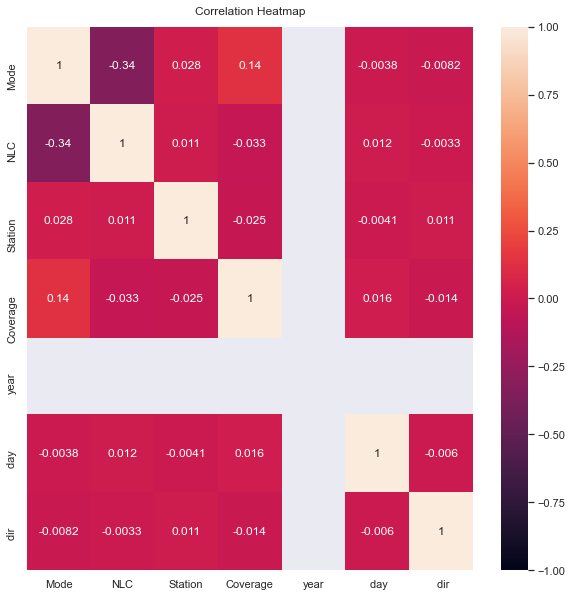

In [166]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [167]:
shap.initjs()
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)
booster = model.get_booster()
model2 = booster.save_raw()[4:]
booster.save_raw = lambda: model2
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test, approximate=True)
index = 910
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test.iloc[index,:])

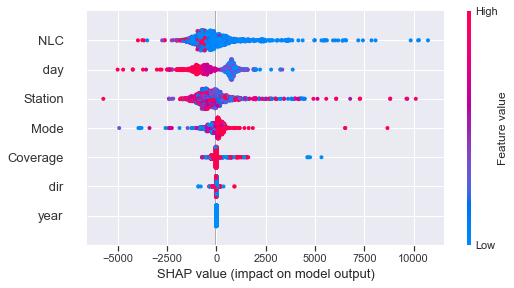

In [168]:
shap.summary_plot(shap_values, X_test)

In [169]:
df3

,Unnamed: 0,Vol,Rate,Vol.1,Rate.1,Vol.2,Rate.2,Vol.3,Rate.3,Vol.4,...,Vol.7,Rate.7,Vol.8,Rate.8,Vol.9,Rate.9,Vol.10,Rate.10,Vol.11,Rate.11
0,Bus,2066,11.3,2148,11.1,2141,11.1,2149,11.2,1745,...,2234,11.6,1925,10.9,1921,10.6,2079,12,2402,12
1,London Underground / Docklands Light Railway,1206,13.3,1359,14.6,1179,13.1,1216,12.5,1151,...,1282,13.4,1130,12,1198,13.6,1187,13.1,1329,12.5
2,London Overground,31,-,20,-,35,-,32,-,37,...,52,-,35,-,42,-,29,-,44,-
3,London Tramlink,38,17.4,41,18.1,41,17.4,35,16.3,26,...,40,18,45,21.6,22,10.4,28,14,26,10.6
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Docklands Light Railway,59,5.910285,40,3.79366,65,6.468584,60,5.672589,49,...,61,5.756336,67,7.451882,77,7.788742,79,8.312544,63,10.366794
85,London Overground,169,11.005939,136,8.788687,151,10.071125,136,8.412282,128,...,144,8.325436,169,12.130687,129,8.0859,137,10.075329,121,10.668966
86,TfL Rail,61,12.764616,53,10.78339,83,17.548181,77,15.118098,83,...,71,13.45389,87,17.228107,74,12.237707,75,13.881755,52,14.884621
87,London Tramlink,19,8.700965,19,7.981303,31,12.784225,24,9.715047,12,...,36,14.57961,20,8.870118,19,7.679561,27,11.908365,16,9.943679


In [170]:
df3.isna().sum()

Unnamed: 0    20
Vol           10
Rate          20
Vol.1         10
Rate.1        20
Vol.2         10
Rate.2        20
Vol.3         10
Rate.3        20
Vol.4         10
Rate.4        20
Vol.5         10
Rate.5        20
Vol.6         10
Rate.6        20
Vol.7         10
Rate.7        20
Vol.8         10
Rate.8        20
Vol.9         10
Rate.9        20
Vol.10        10
Rate.10       20
Vol.11        10
Rate.11       20
dtype: int64

In [171]:
df3.dtypes

Unnamed: 0    object
Vol           object
Rate          object
Vol.1         object
Rate.1        object
Vol.2         object
Rate.2        object
Vol.3         object
Rate.3        object
Vol.4         object
Rate.4        object
Vol.5         object
Rate.5        object
Vol.6         object
Rate.6        object
Vol.7         object
Rate.7        object
Vol.8         object
Rate.8        object
Vol.9         object
Rate.9        object
Vol.10        object
Rate.10       object
Vol.11        object
Rate.11       object
dtype: object

In [173]:
df3

,Unnamed: 0,Vol,Rate,Vol.1,Rate.1,Vol.2,Rate.2,Vol.3,Rate.3,Vol.4,...,Vol.7,Rate.7,Vol.8,Rate.8,Vol.9,Rate.9,Vol.10,Rate.10,Vol.11,Rate.11
0,Bus,2066,11.3,2148,11.1,2141,11.1,2149,11.2,1745,...,2234,11.6,1925,10.9,1921,10.6,2079,12,2402,12
1,London Underground / Docklands Light Railway,1206,13.3,1359,14.6,1179,13.1,1216,12.5,1151,...,1282,13.4,1130,12,1198,13.6,1187,13.1,1329,12.5
2,London Overground,31,-,20,-,35,-,32,-,37,...,52,-,35,-,42,-,29,-,44,-
3,London Tramlink,38,17.4,41,18.1,41,17.4,35,16.3,26,...,40,18,45,21.6,22,10.4,28,14,26,10.6
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Docklands Light Railway,59,5.910285,40,3.79366,65,6.468584,60,5.672589,49,...,61,5.756336,67,7.451882,77,7.788742,79,8.312544,63,10.366794
85,London Overground,169,11.005939,136,8.788687,151,10.071125,136,8.412282,128,...,144,8.325436,169,12.130687,129,8.0859,137,10.075329,121,10.668966
86,TfL Rail,61,12.764616,53,10.78339,83,17.548181,77,15.118098,83,...,71,13.45389,87,17.228107,74,12.237707,75,13.881755,52,14.884621
87,London Tramlink,19,8.700965,19,7.981303,31,12.784225,24,9.715047,12,...,36,14.57961,20,8.870118,19,7.679561,27,11.908365,16,9.943679


In [174]:
df3.isna().sum()

Unnamed: 0    20
Vol           10
Rate          20
Vol.1         10
Rate.1        20
Vol.2         10
Rate.2        20
Vol.3         10
Rate.3        20
Vol.4         10
Rate.4        20
Vol.5         10
Rate.5        20
Vol.6         10
Rate.6        20
Vol.7         10
Rate.7        20
Vol.8         10
Rate.8        20
Vol.9         10
Rate.9        20
Vol.10        10
Rate.10       20
Vol.11        10
Rate.11       20
dtype: int64

In [175]:
def preprocess(dataset):
    X = pd.DataFrame()

    X = dataset[val]
    
    Y = dataset['En/Ex']

    # Label encoding for categorical variables
    label_encoder = LabelEncoder()

    X['Mode'] = label_encoder.fit_transform(dataset['Mode'])
    #X['ASC'] = label_encoder.fit_transform(dataset['ASC'])
    X['Station'] = label_encoder.fit_transform(dataset['Station'])
    X['Coverage'] = label_encoder.fit_transform(dataset['Coverage'])
    X['Source'] = label_encoder.fit_transform(dataset['Source'])


    return X, Y

In [176]:
df4

,Month,Bus,London Underground (includes DLR up to Mar-17),London Overground,London Tramlink,TfL Rail
0,2009-04-01,11.3,13.3,-,17.4,-
1,2009-05-01,11.1,14.6,-,18.1,-
2,2009-06-01,11.1,13.1,-,17.4,-
3,2009-07-01,11.2,12.5,-,16.3,-
4,2009-08-01,9.7,13.2,-,17.4,-
...,...,...,...,...,...,...
127,2019-11-01,8.0,15.9,8.3,14.6,13.5
128,2019-12-01,7.6,23.5,12.1,8.9,17.2
129,2020-01-01,7.9,17.6,8.1,7.7,12.2
130,2020-02-01,8.3,16.8,10.1,11.9,13.9


In [177]:
df4.isna().sum()

Month                                             0
Bus                                               0
London Underground (includes DLR up to Mar-17)    0
London Overground                                 0
London Tramlink                                   0
TfL Rail                                          0
dtype: int64

In [178]:
df5

,Route,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13
0,25,1.008506e+07,1.134801e+07,1.232082e+07,1.430214e+07,1.711910e+07,2.105701e+07,2.205387e+07,2.236823e+07,2.283095e+07,2.312893e+07,23170101,2.330150e+07,2.300007e+07,2.341540e+07
1,18,8.383642e+06,9.828572e+06,1.062813e+07,1.252926e+07,1.410038e+07,1.562356e+07,1.593453e+07,1.616167e+07,1.649599e+07,1.671129e+07,16741037,1.687472e+07,1.768658e+07,1.715388e+07
2,29,1.054761e+07,1.157532e+07,1.232452e+07,1.334450e+07,1.566157e+07,1.699164e+07,1.688031e+07,1.432892e+07,1.462534e+07,1.481622e+07,14842592,1.492677e+07,1.570234e+07,1.687339e+07
3,149,1.203599e+07,1.292112e+07,1.372566e+07,1.424930e+07,1.579203e+07,1.521195e+07,1.485580e+07,1.506756e+07,1.537925e+07,1.557997e+07,15607706,1.532019e+07,1.488353e+07,1.461298e+07
4,38,9.593947e+06,9.593238e+06,9.049692e+06,1.046002e+07,1.229924e+07,1.096869e+07,1.397016e+07,1.786050e+07,1.822997e+07,1.846789e+07,17469872,1.525372e+07,1.485856e+07,1.350395e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,X30,1.121190e+05,1.239600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00
1013,X53,1.872750e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00
1014,TOTAL,1.288845e+09,1.376968e+09,1.426999e+09,1.562694e+09,1.757986e+09,1.872932e+09,1.951481e+09,1.925821e+09,1.982486e+09,2.087236e+09,2117106190,2.135878e+09,2.171695e+09,2.124730e+09
1015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
df5.isna().sum()

Route      2
1999/00    2
2000/01    2
2001/02    2
2002/03    2
2003/04    2
2004/05    2
2005/06    2
2006/07    2
2007/08    2
2008/09    2
2009/10    1
2010/11    2
2011/12    2
2012/13    2
dtype: int64

In [181]:
df6

,Concession type,LU,Bus,Overall
0,Child U16 (paid),0.026,0.000,0.009
1,Free Child,0.002,0.139,0.091
2,Student,0.027,0.028,0.028
3,Jobcentre Plus,0.001,0.002,0.002
4,16/17,0.010,0.048,0.035
5,Bus & Tram discount,0.000,0.032,0.021
6,Freedom Pass,0.043,0.139,0.106
7,60+ Pass,0.003,0.007,0.006
8,Total,0.112,0.395,0.296


In [182]:
df6.isna().sum()

Concession type    0
LU                 0
Bus                0
Overall            0
dtype: int64

In [183]:
df7

,Type,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,...,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22
0,Bus passenger journeys annually,1296000000,1354000000,1430000000,1534000000,1702000000,1793000000,1816000000,2069000000,2176000000,...,2335000000,2387000000,2410000000,2437000000,2468000000,2473000000,2498000000,2523000000,2529000000,2554000000
1,Bus-km operated,354200000,364800000,380600000,408200000,444619000,456664000,461898000,466909000,468200000,...,490450000,491000000,491000000,493000000,497000000,500000000,502000000,505000000,507000000,510000000
2,Source,Travel in London Report 3 (page 48),Travel in London Report 3 (page 48),TfL Annual report 2002/03 (page 40),TfL Annual report 2007/08 (page 11),TfL Annual report 2007/08 (page 11),TfL Annual report 2007/08 (page 11),TfL Annual report 2007/08 (page 11),TfL Annual report 2007/08 (page 11),TfL Annual report 2007/08 (page 11),...,TfL Annual report 2012/13 (page 12),Tfl submission for investigation (page 12),Tfl submission for investigation (page 12),Tfl submission for investigation (page 12),Tfl submission for investigation (page 12),Tfl submission for investigation (page 12),Tfl submission for investigation (page 12),Tfl submission for investigation (page 12),Tfl submission for investigation (page 12),Tfl submission for intestigation (page 12)
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Note,The method for calculating bus passenger journ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Growth in bus km,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1999/00,354200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
df7.drop(df7.tail(18).index,inplace=True)

In [185]:
df7

,Type,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,...,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22
0,Bus passenger journeys annually,1296000000,1354000000,1430000000,1534000000,1702000000,1793000000,1816000000,2069000000,2176000000,...,2335000000,2387000000,2410000000,2437000000,2468000000,2473000000,2498000000,2523000000,2529000000,2554000000
1,Bus-km operated,354200000,364800000,380600000,408200000,444619000,456664000,461898000,466909000,468200000,...,490450000,491000000,491000000,493000000,497000000,500000000,502000000,505000000,507000000,510000000
2,Source,Travel in London Report 3 (page 48),Travel in London Report 3 (page 48),TfL Annual report 2002/03 (page 40),TfL Annual report 2007/08 (page 11),TfL Annual report 2007/08 (page 11),TfL Annual report 2007/08 (page 11),TfL Annual report 2007/08 (page 11),TfL Annual report 2007/08 (page 11),TfL Annual report 2007/08 (page 11),...,TfL Annual report 2012/13 (page 12),Tfl submission for investigation (page 12),Tfl submission for investigation (page 12),Tfl submission for investigation (page 12),Tfl submission for investigation (page 12),Tfl submission for investigation (page 12),Tfl submission for investigation (page 12),Tfl submission for investigation (page 12),Tfl submission for investigation (page 12),Tfl submission for intestigation (page 12)


In [186]:
df7.isna().sum()

Type       0
1999/00    0
2000/01    0
2001/02    0
2002/03    0
2003/04    0
2004/05    0
2005/06    0
2006/07    0
2007/08    0
2008/09    0
2009/10    0
2010/11    0
2011/12    0
2012/13    0
2013/14    0
2014/15    0
2015/16    0
2016/17    0
2017/18    0
2018/19    0
2019/20    0
2020/21    0
2021/22    0
dtype: int64

In [187]:
df7.drop(df7.tail(1).index,inplace=True)

In [188]:
df7

,Type,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,...,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22
0,Bus passenger journeys annually,1296000000,1354000000,1430000000,1534000000,1702000000,1793000000,1816000000,2069000000,2176000000,...,2335000000,2387000000,2410000000,2437000000,2468000000,2473000000,2498000000,2523000000,2529000000,2554000000
1,Bus-km operated,354200000,364800000,380600000,408200000,444619000,456664000,461898000,466909000,468200000,...,490450000,491000000,491000000,493000000,497000000,500000000,502000000,505000000,507000000,510000000


In [189]:
df7.columns = df7.iloc[0]

In [190]:
df7

,Bus passenger journeys annually,1296000000,1354000000,1430000000,1534000000,1702000000,1793000000,1816000000,2069000000,2176000000,...,2335000000,2387000000,2410000000,2437000000,2468000000,2473000000,2498000000,2523000000,2529000000,2554000000
0,Bus passenger journeys annually,1296000000,1354000000,1430000000,1534000000,1702000000,1793000000,1816000000,2069000000,2176000000,...,2335000000,2387000000,2410000000,2437000000,2468000000,2473000000,2498000000,2523000000,2529000000,2554000000
1,Bus-km operated,354200000,364800000,380600000,408200000,444619000,456664000,461898000,466909000,468200000,...,490450000,491000000,491000000,493000000,497000000,500000000,502000000,505000000,507000000,510000000
